In [107]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb

In [108]:
def notEmpty(s):
    return s != ''

In [141]:
path = "datas/zhengqi_train.txt"
# 由于数据文件格式不统一,所以读取的时候,
# 先按照一行一个字段属性读取数据,然后再按照每行数据进行处理
fd = pd.read_csv(path, sep='\s+', header=0)
x, y = np.split(fd, (38,), axis=1)
# 查看数据信息
df = pd.DataFrame(x)
# df.info()
# df.describe().T
df = df.drop(['V5', 'V17', 'V22', 'V27', 'V21', 'V20'], axis=1)
# df.sort_values(df.var())
df.var().sort_values()



V11    0.737029
V31    0.762179
V4     0.789213
V26    0.791693
V12    0.799401
V8     0.801819
V30    0.813485
V32    0.814657
V2     0.830350
V25    0.838978
V6     0.842823
V13    0.851480
V0     0.861242
V28    0.864711
V1     0.886450
V18    0.909098
V9     0.909758
V7     0.912246
V10    0.937552
V3     0.941478
V36    0.942476
V23    0.957966
V16    0.966542
V35    0.971555
V34    1.006593
V33    1.014040
V14    1.031413
V37    1.034687
V15    1.067189
V24    1.067923
V29    1.126145
V19    1.229568
dtype: float64

In [143]:
# 数据的分割,
x_train, x_test, y_train, y_test = train_test_split(
    x,y, 
    train_size=0.8, 
    random_state=14
)
print(
    "训练数据集样本数目:%d, 测试数据集样本数目:%d" 
    % 
    (x_train.shape[0], x_test.shape[0])
)

训练数据集样本数目:2310, 测试数据集样本数目:578


In [144]:
# XGBoost将数据转换为XGBoost可用的数据类型
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

In [145]:
# XGBoost模型构建
# 1. 参数构建
params = {
    'max_depth': 4, 
    'eta':0.852, 
    'silent':1, 
    'objective':'reg:linear'
}
num_round = 2
# 2. 模型训练
bst = xgb.train(params, dtrain, num_round)
# 3. 模型保存
bst.save_model('xgb.model')
# XGBoost模型预测
y_pred = bst.predict(dtest)
print('mean_squared_error = %f' % mean_squared_error(y_pred, y_test))

mean_squared_error = 0.133685


mean_squared_error = 0.143232


In [37]:
# 4. 加载模型
bst2 = xgb.Booster()
bst2.load_model('xgb.model')
# 5 使用加载模型预测
y_pred2 = bst2.predict(dtest)
print('mean_squared_error = %f' % mean_squared_error(y_pred2, y_test))

mean_squared_error = 0.365290


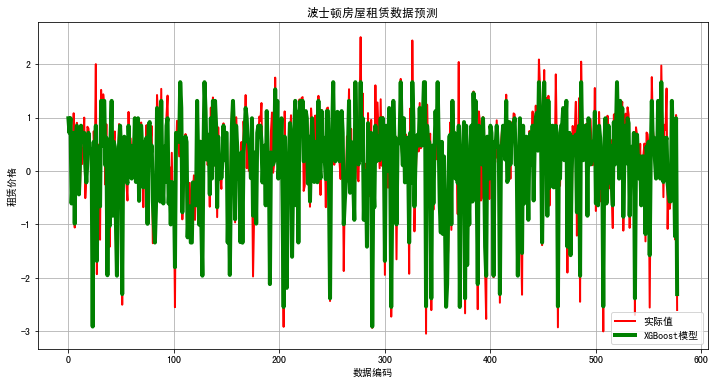

In [60]:
# 画图
# 7. 画图 
plt.figure(figsize=(12, 6), facecolor='w')
ln_x_test = range(len(x_test))

plt.plot(ln_x_test, y_test, 'r-', lw=2, label=u'实际值')
plt.plot(ln_x_test, y_pred, 'g-', lw=4, label=u'XGBoost模型')

plt.xlabel(u'数据编码')
plt.ylabel(u'租赁价格')

plt.legend(loc='lower right')
plt.grid(True)
plt.title(u'波士顿房屋租赁数据预测')
plt.show()

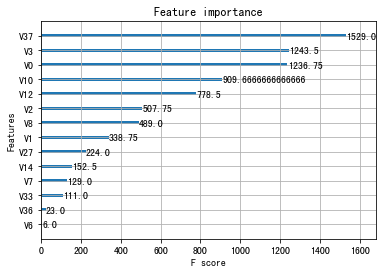

In [61]:
from xgboost import plot_importance
from matplotlib import pyplot

# 找出最重要的特征
plot_importance(bst, importance_type = 'cover')
pyplot.show()